## How Can Interest Rates Be Predicted Based on Borrower Features ? 
***

#### The Lending Club is a site that facilitates peer-to-peer lending, and allows members to lend and borrow from each other. The site has made their data regarding loans and borrowers publicy available. This data will now be used to examine and explore the relationship between various borrower attributes and the interest rate charged

We are going to identify a set of variables through data exploration and visualization that we will then use to define a multivariate linear regression model. 
 

In [1]:
%matplotlib inline 
import re
import seaborn as sns 
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
loanData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [3]:
loanData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [4]:
loanData.describe()

Amount.Requested  Amount.Funded.By.Investors  Monthly.Income  \
count       2500.000000                 2500.000000     2499.000000   
mean       12406.500000                12001.573236     5688.931321   
std         7801.544872                 7745.320754     3963.118185   
min         1000.000000                   -0.010000      588.500000   
25%         6000.000000                 6000.000000     3500.000000   
50%        10000.000000                10000.000000     5000.000000   
75%        17000.000000                16000.000000     6800.000000   
max        35000.000000                35000.000000   102750.000000   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
count        2498.000000               2498.000000   
mean           10.075661              15244.559648   
std             4.508644              18308.549795   
min             2.000000                  0.000000   
25%             7.000000               5585.750000   
50%             9.000000              10962.000000   
75%            13.000000              18888.750000   
max            38.000000             270800.000000   

       Inquiries.in.the.Last.6.Months  
count                     2498.000000  
mean                         0.906325  
std                          1.231036  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          1.000000  
max                          9.000000

In [5]:
loanData.head()

Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
81174             20000                     20000.0         8.90%   36 months   
99592             19200                     19200.0        12.12%   36 months   
80059             35000                     35000.0        21.98%   60 months   
15825             10000                      9975.0         9.99%   36 months   
33182             12000                     12000.0        11.71%   36 months   

             Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
81174  debt_consolidation               14.90%    SC       MORTGAGE   
99592  debt_consolidation               28.36%    TX       MORTGAGE   
80059  debt_consolidation               23.81%    CA       MORTGAGE   
15825  debt_consolidation               14.30%    KS       MORTGAGE   
33182         credit_card               18.78%    NJ           RENT   

       Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
81174         6541.67    735-739               14.0                   14272.0   
99592         4583.33    715-719               12.0                   11140.0   
80059        11500.00    690-694               14.0                   21977.0   
15825         3833.33    695-699               10.0                    9346.0   
33182         3195.00    695-699               11.0                   14469.0   

       Inquiries.in.the.Last.6.Months Employment.Length  
81174                             2.0          < 1 year  
99592                             1.0           2 years  
80059                             1.0           2 years  
15825                             0.0           5 years  
33182                             0.0           9 years

# PART 1 : Data Cleaning

### Removing special characters 

In [6]:
loanData['Interest.Rate']= [x.strip('%') for x in loanData['Interest.Rate']]
loanData['Debt.To.Income.Ratio']= [x.strip('%') for x in loanData['Debt.To.Income.Ratio']]
loanData['Loan.Length']= [x.strip('months') for x in loanData['Loan.Length']]

In [7]:
loanData.head()

Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
81174             20000                     20000.0          8.90         36    
99592             19200                     19200.0         12.12         36    
80059             35000                     35000.0         21.98         60    
15825             10000                      9975.0          9.99         36    
33182             12000                     12000.0         11.71         36    

             Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
81174  debt_consolidation                14.90    SC       MORTGAGE   
99592  debt_consolidation                28.36    TX       MORTGAGE   
80059  debt_consolidation                23.81    CA       MORTGAGE   
15825  debt_consolidation                14.30    KS       MORTGAGE   
33182         credit_card                18.78    NJ           RENT   

       Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
81174         6541.67    735-739               14.0                   14272.0   
99592         4583.33    715-719               12.0                   11140.0   
80059        11500.00    690-694               14.0                   21977.0   
15825         3833.33    695-699               10.0                    9346.0   
33182         3195.00    695-699               11.0                   14469.0   

       Inquiries.in.the.Last.6.Months Employment.Length  
81174                             2.0          < 1 year  
99592                             1.0           2 years  
80059                             1.0           2 years  
15825                             0.0           5 years  
33182                             0.0           9 years

### Converting data types 

In [8]:
loanData.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [9]:
loanData['Loan.Length']=loanData['Loan.Length'].astype(str).astype(int)
loanData['Interest.Rate']=loanData['Interest.Rate'].astype(str).astype(float)

In [10]:
loanData['Debt.To.Income.Ratio']=loanData['Debt.To.Income.Ratio'].astype(str).astype(float)

In [11]:
loanData['FICO.Range']= loanData['FICO.Range'].astype(str)   
loanData['FICO.Range'] = loanData['FICO.Range'].map(lambda x: ''.join([i for i in x if i.isdigit()]))

In [12]:
loanData['FICO.Range'] = loanData['FICO.Range'].str[:3]
loanData['FICO.Range']= loanData['FICO.Range'].astype(int)  
loanData['FICO.Range'].head()

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Range, dtype: int64

### Missing value treatment

In [13]:
loanData.loc[:, loanData.isna().any()]

Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
81174         6541.67               14.0                   14272.0   
99592         4583.33               12.0                   11140.0   
80059        11500.00               14.0                   21977.0   
15825         3833.33               10.0                    9346.0   
33182         3195.00               11.0                   14469.0   
...               ...                ...                       ...   
23735         9250.00               15.0                   45880.0   
65882         8903.25               18.0                   18898.0   
55610         2166.67                4.0                    4544.0   
38576         3500.00                8.0                    7753.0   
3116          3875.00                7.0                    7589.0   

       Inquiries.in.the.Last.6.Months Employment.Length  
81174                             2.0          < 1 year  
99592                             1.0           2 years  
80059                             1.0           2 years  
15825                             0.0           5 years  
33182                             0.0           9 years  
...                               ...               ...  
23735                             1.0           8 years  
65882                             1.0         10+ years  
55610                             0.0         10+ years  
38576                             0.0           5 years  
3116                              0.0         10+ years  

[2500 rows x 5 columns]

In [14]:
loanData = loanData.dropna()

### Outlier Treatment

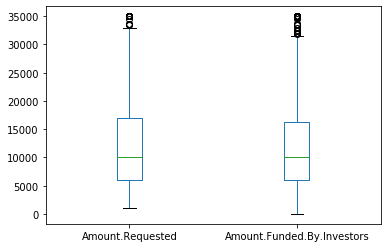

In [15]:
loanData.boxplot(column=['Amount.Requested','Amount.Funded.By.Investors'], grid=False)

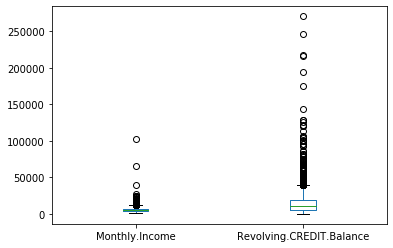

In [16]:
loanData.boxplot(column=['Monthly.Income','Revolving.CREDIT.Balance'], grid=False)

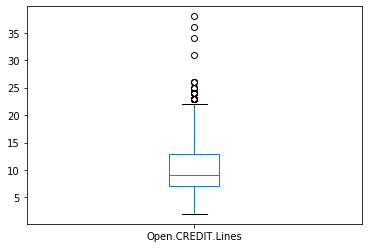

In [17]:
loanData.boxplot(column=['Open.CREDIT.Lines'], grid=False)

Now that we have created boxplots to see what variables need outlier treatment. The IQR will now be calculated to determine what percent of the data for particular attributes are outliers (above the upper limit and above the extreme upper limit). 

##### Calculating IQR

In [18]:
Q1 = loanData.quantile(0.25)
Q3= loanData.quantile(0.75)
IQR= Q3-Q1
print(IQR)

Amount.Requested                  10925.00
Amount.Funded.By.Investors        10200.00
Interest.Rate                         5.64
Loan.Length                           0.00
Debt.To.Income.Ratio                 10.91
Monthly.Income                     3333.33
FICO.Range                           45.00
Open.CREDIT.Lines                     6.00
Revolving.CREDIT.Balance          13412.00
Inquiries.in.the.Last.6.Months        1.00
dtype: float64


In [19]:
print(loanData < (Q1 - 1.5 * IQR)) and (loanData > (Q3 + 1.5 * IQR))

       Amount.Funded.By.Investors  Amount.Requested  Debt.To.Income.Ratio  \
81174                       False             False                 False   
99592                       False             False                 False   
80059                       False             False                 False   
15825                       False             False                 False   
33182                       False             False                 False   
...                           ...               ...                   ...   
23735                       False             False                 False   
65882                       False             False                 False   
55610                       False             False                 False   
38576                       False             False                 False   
3116                        False             False                 False   

       Employment.Length  FICO.Range  Home.Ownership  \
81174              

Here using the IQR, columns were generated in which False indicates that the value is valid and True indicates that the value is an outlier. There are no outliers as determined by this method, but the z-score which is similar in concept to IQR will be used to double check that there are no outlying values in any of the columns

#### Using Z-Score

In [20]:
a = np.abs(stats.zscore(loanData['Monthly.Income']))
b = np.abs(stats.zscore(loanData['Debt.To.Income.Ratio']))
c = np.abs(stats.zscore(loanData['Interest.Rate']))
d = np.abs(stats.zscore(loanData['Loan.Length']))
e = np.abs(stats.zscore(loanData['Revolving.CREDIT.Balance']))
f = np.abs(stats.zscore(loanData['Open.CREDIT.Lines']))
g = np.abs(stats.zscore(loanData['Amount.Funded.By.Investors']))
h = np.abs(stats.zscore(loanData['Amount.Requested']))
i = np.abs(stats.zscore(loanData['FICO.Range']))

In [21]:
print("Monthly Income: ", np.where(a>3))
print("Debt To Income Ratio: ", np.where(b>3))
print("Interest Rate: ", np.where(c>3))
print("Loan Length: ", np.where(d>3))
print("Revolving Credit Lines: ", np.where(e>3))

Monthly Income:  (array([ 107,  204,  257,  452,  671,  740,  862,  883,  971,  995, 1189,
       1241, 1269, 1276, 1344, 1354, 1380, 1583, 1604, 1613, 1639, 1792,
       1833, 1876, 1935, 1982, 2071, 2110, 2279, 2317, 2383, 2399]),)
Debt To Income Ratio:  (array([], dtype=int64),)
Interest Rate:  (array([], dtype=int64),)
Loan Length:  (array([], dtype=int64),)
Revolving Credit Lines:  (array([  37,  131,  169,  195,  209,  251,  349,  461,  564,  671,  677,
        806,  830,  840,  862,  883,  948, 1061, 1163, 1177, 1207, 1241,
       1269, 1344, 1357, 1390, 1402, 1437, 1443, 1615, 1638, 1695, 1721,
       1792, 1856, 1863, 1885, 1895, 2141, 2234, 2279, 2317]),)


In [22]:
print("Open Credit Lines: ", np.where(f>3))
print("Amount Funded by Investors: ", np.where(g>3))
print("Amount Requested: ", np.where(h>3))
print("FICO Range: ", np.where(i>3))

Open Credit Lines:  (array([ 406,  671,  830,  994, 1177, 1437, 1535, 1763, 1839, 1884, 1972,
       2059, 2112, 2120, 2153, 2333, 2339]),)
Amount Funded by Investors:  (array([], dtype=int64),)
Amount Requested:  (array([], dtype=int64),)
FICO Range:  (array([  37, 1568, 1608, 1641, 1887, 2056, 2323]),)


In [23]:
loanData['Monthly.Income']=loanData['Monthly.Income'][a<3]
loanData['Open.CREDIT.Lines']=loanData['Open.CREDIT.Lines'][a<3]
loanData['FICO.Range']=loanData['FICO.Range'][a<3]

In [24]:
loanData.describe()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
count       2421.000000                 2421.000000    2421.000000   
mean       12496.117307                12079.937889      13.077266   
std         7779.417967                 7723.808467       4.158633   
min         1000.000000                   -0.010000       5.420000   
25%         6075.000000                 6000.000000      10.160000   
50%        10000.000000                10000.000000      13.110000   
75%        17000.000000                16200.000000      15.800000   
max        35000.000000                35000.000000      24.890000   

       Loan.Length  Debt.To.Income.Ratio  Monthly.Income   FICO.Range  \
count  2421.000000           2421.000000     2389.000000  2389.000000   
mean     41.323420             15.393230     5475.617166   705.673922   
std       9.973182              7.480949     2716.164163    34.842100   
min      36.000000              0.000000      588.500000   640.000000   
25%      36.000000              9.760000     3500.000000   680.000000   
50%      36.000000             15.330000     5000.000000   700.000000   
75%      36.000000             20.670000     6706.410000   725.000000   
max      60.000000             34.910000    17500.000000   830.000000   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
count        2389.000000               2421.000000   
mean           10.086229              15328.410574   
std             4.498196              18341.384831   
min             2.000000                  0.000000   
25%             7.000000               5624.000000   
50%             9.000000              11058.000000   
75%            13.000000              19036.000000   
max            38.000000             270800.000000   

       Inquiries.in.the.Last.6.Months  
count                     2421.000000  
mean                         0.906237  
std                          1.235447  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          1.000000  
max                          9.000000

In [25]:
loanData.loc[:, loanData.isna().any()]

Monthly.Income  FICO.Range  Open.CREDIT.Lines
81174         6541.67       735.0               14.0
99592         4583.33       715.0               12.0
80059        11500.00       690.0               14.0
15825         3833.33       695.0               10.0
33182         3195.00       695.0               11.0
...               ...         ...                ...
23735         9250.00       705.0               15.0
65882         8903.25       740.0               18.0
55610         2166.67       680.0                4.0
38576         3500.00       675.0                8.0
3116          3875.00       670.0                7.0

[2421 rows x 3 columns]

In [26]:
loanData = loanData.dropna()

# PART 2 : Visual Exploration

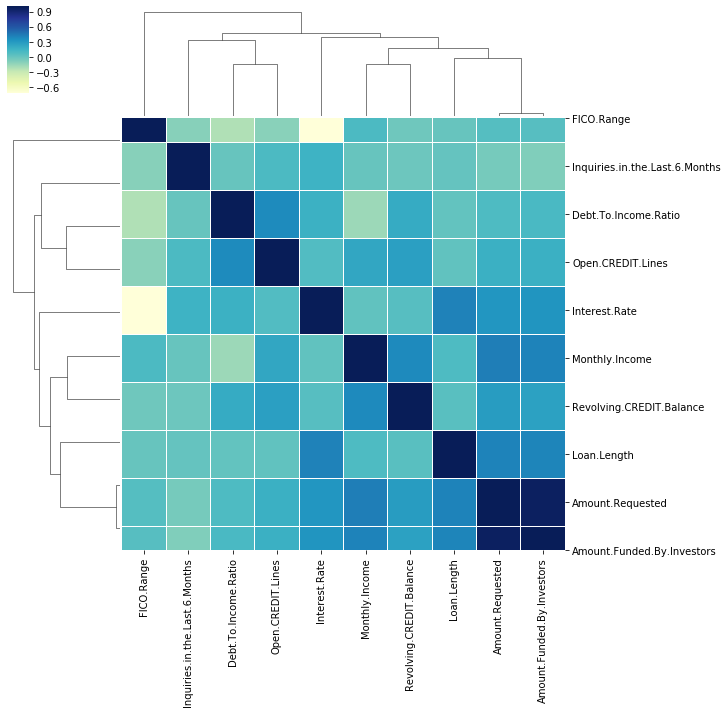

In [27]:
corrmat = loanData.corr()
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
  
cg 

In [28]:
loanData[loanData.columns[1:]].corr()['Interest.Rate'][:]

Amount.Funded.By.Investors        0.335304
Interest.Rate                     1.000000
Loan.Length                       0.423294
Debt.To.Income.Ratio              0.175924
Monthly.Income                    0.033315
FICO.Range                       -0.708293
Open.CREDIT.Lines                 0.092163
Revolving.CREDIT.Balance          0.069589
Inquiries.in.the.Last.6.Months    0.162420
Name: Interest.Rate, dtype: float64

In [29]:
corr = loanData.corr()
cor_target = abs(corr['Interest.Rate'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Interest.Rate    1.000000
FICO.Range       0.708293
Name: Interest.Rate, dtype: float64

Based on prior domain knowledge, FICO Score is known to be a deciding factor of interest rate. 

In [30]:
corr.style.background_gradient(cmap='coolwarm',axis=None).set_properties(**{'font-size': '10pt'})

The visual exploration section was fairly small as there is already plenty of domain knowledge available to immediatley draw parallels and infrences from the data. It is clear that FICO score is an important determining factor of interest rate, and further analysis shows that Amount Requested is an important factor. 
Many of the cells above in Part 2 essentially did the same thing, I just wanted to expirement with the different ways correlation could be examined.

For the next part which will be the Linear Regression Analysis, we will focus on the relationship between Interest Rate, FICO Score and the Amount Requested. 

# PART 3 - Linear Regression Analysis

In this section we will be examining the relationship between Interest Rate, which is the dependent variable and Amount Requested and FICO Score as the two independent variables. We will use these variables to define a linear model. 

#### Multivariate Linear Regression : InterestRate = a0+a1∗FICOScore+a2∗LoanAmount

In [31]:
import statsmodels.api as sm

In [32]:
df = loanData

In [33]:
intrate = df ['Interest.Rate']
loanamt = df ['Amount.Requested']
fico = df ['FICO.Range']

In [34]:
y = np.matrix(intrate).transpose()
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [35]:
x = np.column_stack([x1,x2])

In [37]:
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2236.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:30:08   Log-Likelihood:                -5528.1
No. Observations:                2389   AIC:                         1.106e+04
Df Residuals:                    2386   BIC:                         1.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5799      1.016     71.420      0.000      70.587      74.573
x1            -0.0880      0.001    -61.009      0.000      -0.091      -0.085
x2             0.0002   6.59e-06     32.114      0.000       0.000       0.000
==============================================================================
Omnibus:                       63.376   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.981
Skew:                           0.367   Prob(JB):                     3.86e-16
Kurtosis:                       3.418   Cond. No.                     2.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print ('Coefficients: ', f.params[0:2])
print ('Intercept: ', f.params[2])
print ('P-Values: ', f.pvalues)
print ('R-Squared: ', f.rsquared)


Our goal was to understand the effect of FICO Score and Amount Requested on the Interest Rate. 
The OLS Summary provided us with some insight into the model we created, to assess this relationship and assess the individual variables as well. Understanding what these individual variables mean is an important aspect of understanding the effect of each on the dependent variable. Below the important aspects of the summary are explained in depth : 

***

#### Interpreting P-values and Coefficents
 - Large P-values suggest that the predictor variables and their changes are not associated with the changes in the response variable. Small P-values (<0.05) suggest that the predictor variables are responsible for the response variables to a certain degree as there is a relationship. 

 - The Coefficents above indicate the average change in the response variable per one unit change in the predictor variables. In each case the other predictors in the model or equation are held constant. This proves extremely useful when analyzing a model as the regression coefficents provide a means of statistical control, by seperating the influence of one variable. 


<font color=red>In the data above the coefficents have a low P-value indicating that one can be reasonably confident in this model. </font>

#### R-Squared:  
 - R-squared which is also known as the coefficent of determination, is a measure of how close the data that is collected is to the fitted regression equation. Basically it is a measure of variable variance accounted by the model. 

 - R-squared = explained variance / total variance 

<font color=red>In the data above the Rsquared value indicates that the model accounts for 65% of variance, another way to say this is that model and the particular predictor variables used can only account for 65% of the variability in the data.
</font> 

 - R-squared is an extremely useful measure of how well your predictor variables and model fit the given set of observations, but R-squared can sometimes fail in providing a clear understanding of this concept. Other measures such as the F-test or adjusted R-squared can give more insight in how to interpret and analyze the power of a regression model. 


#### F-Stat or F-Test: 
 - An F-test compares how well different linear models fit. It essentially compares a model with no predictor variables, to the model at hand. And using the F-Test value in comparison with its p-value one can either accept or reject the null hypothesis. 
 
 - If the p-value of the F-test, is less than the the F-value, the model created is a better fit than the intercept model. The intercept model is another word for a model with no predictor variables. In the intercept model, all of the values that are fitted are the mean of the response variable at hand. 
 
 - The F-test determines if the predictor variables together are significant. Usually if the p-values of the indvidual coefficents are not signifcant, the f-test value will be insignificant as well. In this case, the p-value could indicate strong individual relationships, but the f-value indicates that the predictor variables together do not have a strong relationship with the response variable. 

<font color=red>In the data above, the F-test value is significant and its p-value is lesser than, indicating the model is a good fit. 

#### Conclusion : 

Overall the model is a good fit per the parameters discussed above, although parameters such as the standard error of the coefficents and condition number indicate multicollinearity between the independent variables. In this case further analysis using VIF, and a larger data set can be used to improve the model and reduce multicollinearity. 